
# Dataset Investigation (Medical Appointment No Shows)
<p><img src="https://storage.googleapis.com/kaggle-datasets-images/792/1472/8853c0b4591bba14e29305fcaa29f2f9/dataset-cover.jpg" alt="Angry doctor"></p>

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#Machinelearningmodel">Building a predictive model</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

**A person makes a doctor appointment, receives all the instructions and no-show. Who to blame?**

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

What are the important factors for us to consider in order to predict if a patient will show up for their scheduled appointment?
- **Is it the age, gender, neighborhood or receiving a reminder message ?**
- **Timespan between appointment date and scheduled date ?**
- **Or the neighbourhood where the patients live ?**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette(sns.color_palette())
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
#loading dataset
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [4]:
df.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB



### Data Cleaning 

#### Quality issues.
1. Typo's in column names should be corrected.
2. Data type of ScheduledDay and AppointmentDay should be changed to DateTime.
3. Data type of PatientId and AppointmentID should be changed to object, as no need for them in any computations.

In [6]:
# Rename incorrect column names.
df = df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived', 'No-show': 'NoShow'})

# Convert ScheduledDay and AppointmentDay from 'object' dtype to 'datetime64[ns]'
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

# Convert PatientId and AppointmentID from 'float64' and 'int64' dtype to 'object'
df['PatientId'] = df['PatientId'].astype(object)
df['AppointmentID'] = df['AppointmentID'].astype(object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  object        
 1   AppointmentID   110527 non-null  object        
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hypertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handicap        110527 non-null  int64         
 12  SMSReceived     110527 non-null  int64         
 13  NoShow          110527 non-null  object        
dtypes: datetime64[ns](2), int64(7), obje

#### Feature engineering
Feature engineering a Timespan feature to calculate the difference in scheduled and appointment date.

In [8]:
df['Timespan']=(df['AppointmentDay'] - df['ScheduledDay']).dt.days
df['Timespan'].describe()

count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: Timespan, dtype: float64

**Stats shows that some timespans are in negative, so I will remove these records.**

In [9]:
#checking negative timespans
print('number of rows with negative timespans = {}'.format(df[df['Timespan'] < 0 ].shape[0]))

number of rows with negative timespans = 5


In [10]:
#removing these 5 rows
df = df[df['Timespan'] >= 0 ]

In [11]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,Timespan
0,2.98725e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.58998e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.26296e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.67951e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.84119e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


<a id='eda'></a>
## Exploratory Data Analysis


Making a copy of the dataframe to prepare data for a correlation heatmap by:
1. Changing target and gender values to zero's and ones.

In [12]:
# zero_one function to convert a column with 2 values to zeros and ones
def zero_one(data, column):
    """
    This function turns a dataframe's column with 2 values into zeros and ones.
    
    Key Arguments:
    data   -- a Dataframe 
    column -- column name dtype(string) 
    """
    data[column].replace({data[column].unique()[0]:0, data[column].unique()[1]:1}, inplace=True)
    
# making a copy of the Dataframe for correlation heatmap 
df_corr = df.copy()

# Changing NoShow and Gender values to zeros and ones 
zero_one(df_corr, 'NoShow')
zero_one(df_corr, 'Gender')

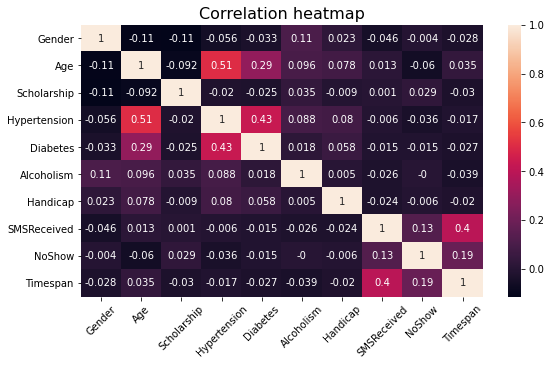

In [13]:
#plotting correlation matrix

plt.figure(figsize=(9,5))
sns.heatmap(df_corr.corr().round(3), annot = True)
plt.title('Correlation heatmap', size='16')
plt.xticks(rotation='45');

**From the above correlation heatmap it shows that the most correlated factors which are actually slightly correlated for not showing up is: \
The time span between scheduling day and appointment day. \
Receiving an SMS, although we might think that it should be the opposite.**

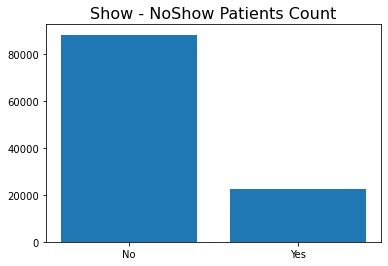

No     88208
Yes    22314
Name: NoShow, dtype: int64

In [14]:
# plotting patient count by Noshow data.

plt.bar(df.NoShow.unique(), df.NoShow.value_counts())
plt.title("Show - NoShow Patients Count", size='16')
plt.show()

df.NoShow.value_counts()

**we can see that out of 110,527 patients around 22,300 of them did not show up, which is about 20%.**

### Research Question 1  (what is the effect of time span between scheduled and appointment date on NoShow?)

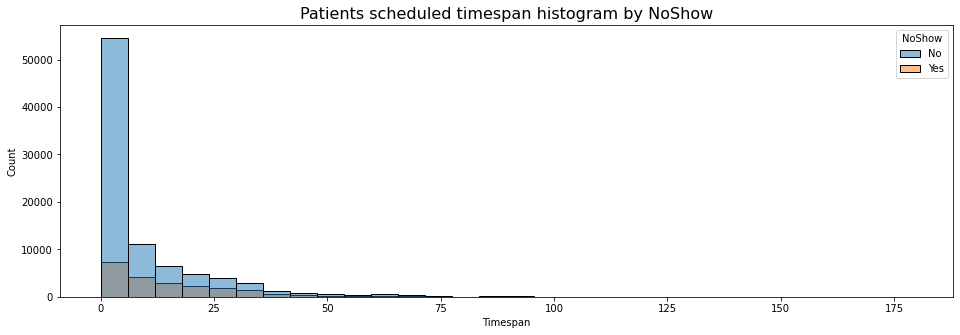

In [15]:
# Plotting Patients scheduled timespan histogram by NoShow

plt.figure(figsize=(16,5))
sns.histplot(df, x="Timespan", hue=df.NoShow, bins=30)
plt.title('Patients scheduled timespan histogram by NoShow', size = '16');

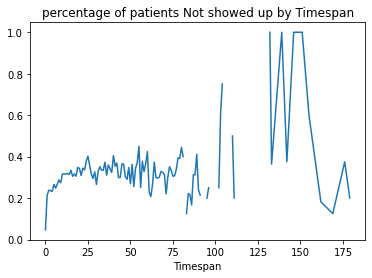

In [16]:
ratio = df[df.NoShow == 'Yes'].groupby(['Timespan']).size()/df.groupby(['Timespan']).size()
ratio.plot()
plt.title('percentage of patients Not showed up by Timespan', size='12')
plt.show()

**plot shows that as time-span increases the ratio of not showing up increases, but not that directly relation.**

### Research Question 2 ( How does recieving an SMS affect Not showing up on date ?! )

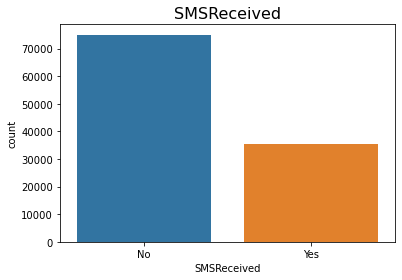

Percentage of peaple recieved an SMS = 32.1%


In [17]:
#plotting SMSReceived
ax = sns.countplot(x=df.SMSReceived, data=df)
ax.set_title("SMSReceived", size='16')
x_ticks_labels=['No', 'Yes']
ax.set_xticklabels(x_ticks_labels)
plt.show()

#printing Percentage of peaple recieved an SMS
print('Percentage of peaple recieved an SMS = {}%'.format((df.SMSReceived.sum()/df.SMSReceived.count()).round(4)*100))

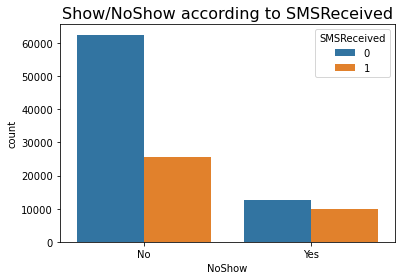

In [18]:
# plotting count of patient with relation to SMSreceived and NoShow.
ax = sns.countplot(x=df.NoShow, hue=df.SMSReceived, data=df)
ax.set_title("Show/NoShow according to SMSReceived", size='16')
plt.show()

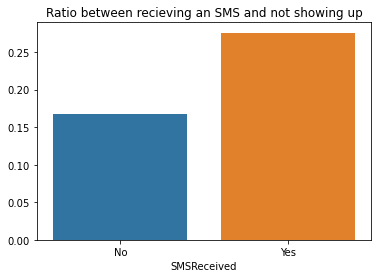

In [19]:
#plotting ratio between recieving an SMS and not showing up
ratio = df[df.NoShow == 'Yes'].groupby(['SMSReceived']).size()/df.groupby(['SMSReceived']).size()
ax = sns.barplot(x=ratio.index, y=ratio)
ax.set_title("Ratio between recieving an SMS and not showing up", size='12')
ax.set_xticklabels(x_ticks_labels)
plt.show()

**Nearly 32% of patients received an SMS, most of them didn't show up.\
Maybe because those who received an SMS had a longer timespan between scheduled date and appointment date\
Lets investigate this point**

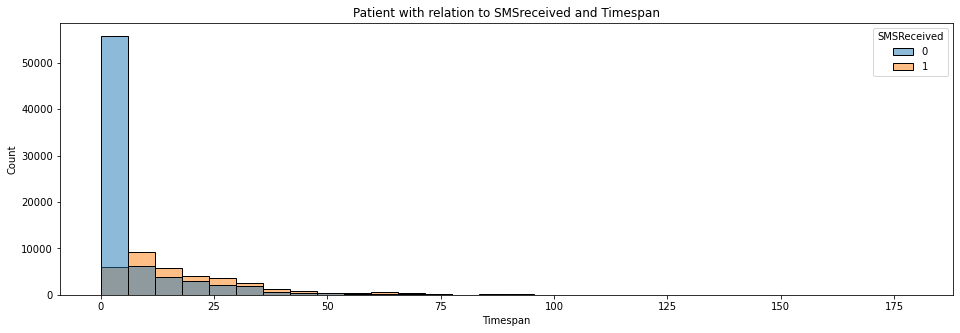

In [20]:
# plotting count of patient with relation to SMSreceived and Timespan

plt.figure(figsize=(16,5))
plt.title('Patient with relation to SMSreceived and Timespan')
sns.histplot(df, x="Timespan", hue=df.SMSReceived, bins=30);

**As I supposed, those who received an SMS had a longer timespan between scheduled date and appointment date\
Thus resulting in a correlation between Time-span, Recieving SMS and Not showing up**

### Research Question 3 ( Does gender type a reason for Not showing ?! )

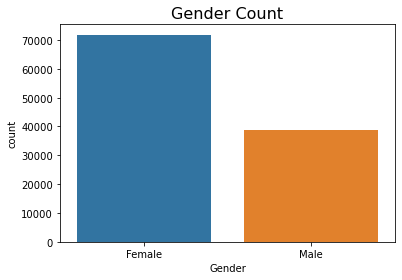

In [21]:
ax = sns.countplot(x=df.Gender, data=df)
ax.set_title("Gender Count", size='16')
x_ticks_labels=['Female', 'Male']
ax.set_xticklabels(x_ticks_labels)
plt.show()

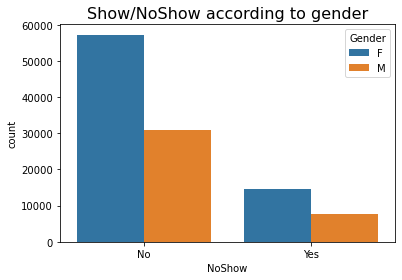

In [22]:
ax = sns.countplot(x=df.NoShow, hue=df.Gender, data=df)
ax.set_title("Show/NoShow according to gender", size='16')
plt.show()

**it's about the same ratio of NoShow in both genders**

### Research Question 4  ( Is age the reason why patient does not show up ? )

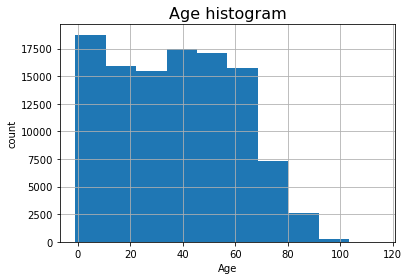

In [23]:
plt.figure()
df.Age.hist()
plt.xlabel('Age')
plt.ylabel('count')
plt.title('Age histogram', size='16')
plt.show()

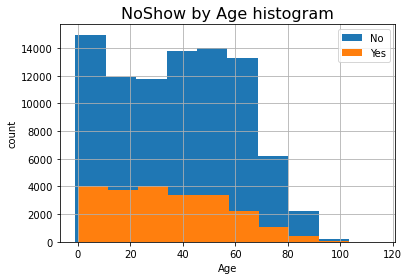

In [24]:
#plotting histogram of patients by NoShow.

plt.figure()
df.groupby(['NoShow']).Age.hist()
plt.xlabel('Age')
plt.ylabel('count')
plt.legend(df.NoShow.unique())
plt.title('NoShow by Age histogram', size='16')
plt.show()

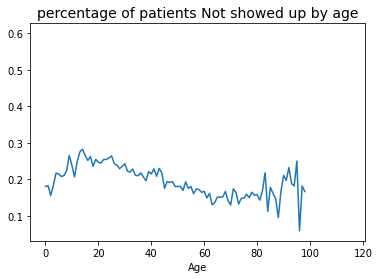

In [25]:
#plotting percentage of patients Not showed up by age

Age_ratio = df[df.NoShow == 'Yes'].groupby(['Age']).size()/df.groupby(['Age']).size()
Age_ratio.plot()
plt.title('percentage of patients Not showed up by age', size='14')
plt.show()

**It seems that the ratio of NoShow to total is not affected much by Age, also it decreases a bit when the age increases.
Ratio also decreases noticeably at minimum age and maximum age.**

### Research Question 5  (Does having a scholarship explains the problem of not showing up? )

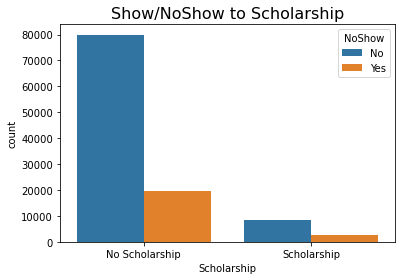

In [26]:
# printing Number of showing up vs not showing up in case of having a scholarship or not

ax = sns.countplot(x=df.Scholarship, hue=df.NoShow, data=df)
ax.set_title("Show/NoShow to Scholarship", size='16')
x_ticks_labels=['No Scholarship', 'Scholarship']
ax.set_xticklabels(x_ticks_labels)
plt.show()

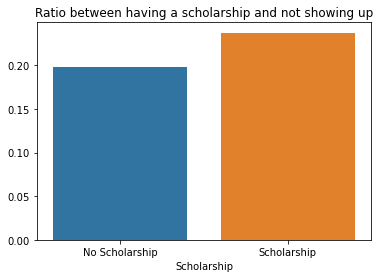

In [27]:
# Printing ratio between Not showing up and patients who have scholarship or not.

Sch_ratio = df[df.NoShow == 'Yes'].groupby(['Scholarship']).size()/df.groupby(['Scholarship']).size()
ax = sns.barplot(x=Sch_ratio.index, y=Sch_ratio)
ax.set_title("Ratio between having a scholarship and not showing up", size='12')
ax.set_xticklabels(x_ticks_labels)
plt.show()

**Alse having a scolarship seems to increase the chance to not show up, but without that much effect**

### Research Question 6  (what does neigbourhood to do with not showing up ? )

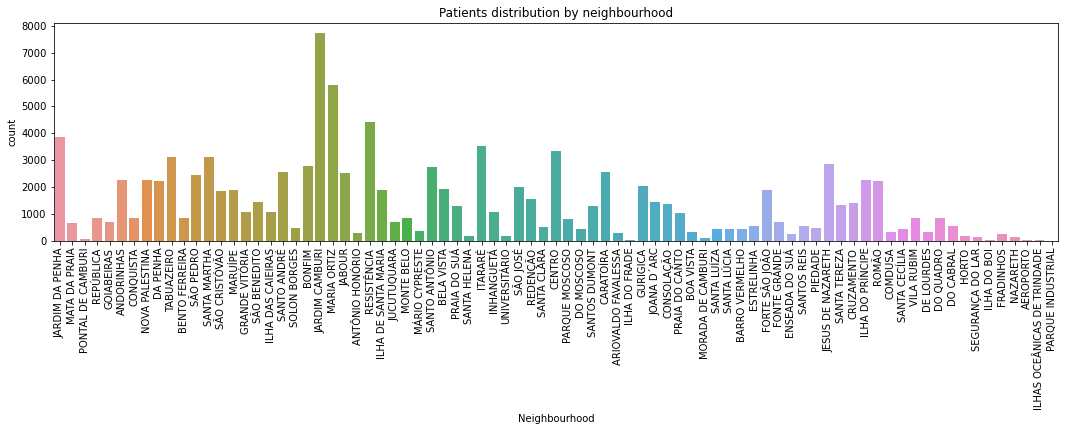

In [28]:
#plotting number of patients from each neighbourhood

plt.figure(figsize=(18,4))
plt.title('Patients distribution by neighbourhood')
sns.countplot(x=df.Neighbourhood, data=df);
plt.xticks(rotation='90')
plt.show()

**Number of patients varies from a neighbourhood to another, so lets investigate the ratio of not showing up.**

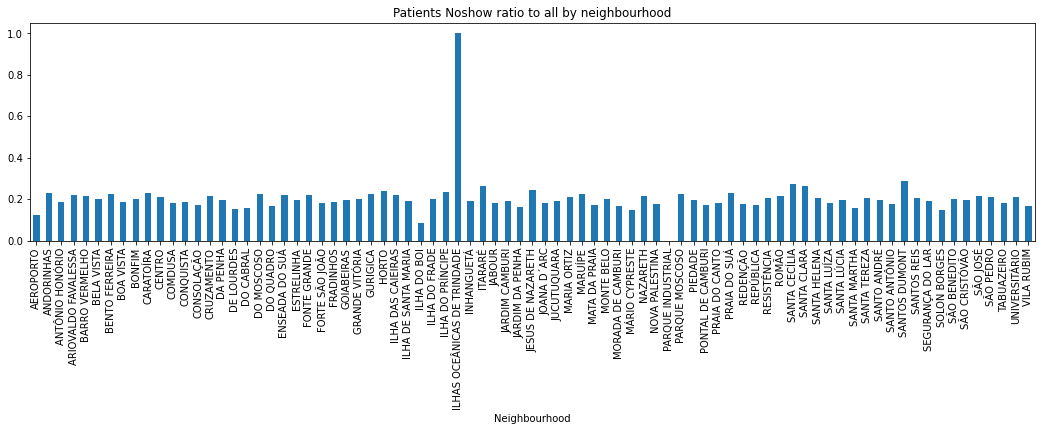

In [29]:
#Plotting ratio between showing up and all patients for every neighbourhood

ratio = df[df.NoShow == 'Yes'].groupby('Neighbourhood').size()/df.groupby('Neighbourhood').size()
plt.figure(figsize=(18,4))
plt.title('Patients Noshow ratio to all by neighbourhood')
ratio.plot(kind='bar');

**Here we can see that it is nearly the same ratio of not showing up for each neighbourhood, although there are 2 irregular information for 2 neighbourhoods.**

In [30]:
#printing number of patients in the 2 neigbourhood with irregular NoShow ratio.

print(df.Neighbourhood.value_counts()['ILHAS OCEÂNICAS DE TRINDADE'])
df.Neighbourhood.value_counts()['PARQUE INDUSTRIAL']

2


1

**it seems that there are no much patients data in those 2 neighboorhood to have an insight.\
And it's better to remove them if we are to build a Machine learning model prevent bias.**

<a id='Machinelearningmodel'></a>
## Building a predictive mode

### Data preprocessing 


1. I will use df_corr dataframe as it has categorial data in the form of zeros and ones which suits machine learning models.
2. As I feature engineered Timespan column, there is no more use for AppointmentDay and ScheduledDay
3. Dropping PatientId and AppointmentID
4. Label encode neighbourhood column.

In [43]:
# important imports for ML model

# imports for preprocessing and pipeline installation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder

# ML Algorithms imports
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from lightgbm import LGBMClassifier

# imports for evaluation
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
# Using a copy of the dataframe with numerical data
df = df_corr.copy()

# Dropping unnecessary columns
df.drop(['AppointmentDay', 'ScheduledDay', 'PatientId', 'AppointmentID'], axis = 1, inplace =True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,Timespan
0,0,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0
1,1,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0
2,0,62,MATA DA PRAIA,0,0,0,0,0,0,0,0
3,0,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0
4,0,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0


In [33]:
# Dropping biased neighbourhood for having no sufficient number of patients data.
df = df[(df.Neighbourhood !='ILHAS OCEÂNICAS DE TRINDADE') & (df.Neighbourhood !='PARQUE INDUSTRIAL')]
df.Neighbourhood.nunique()

79

In [34]:
# instaniate an encoder
label_encoder = LabelEncoder()
# Neighbourhood encoding to numbers.
df['Neighbourhood'] = label_encoder.fit_transform(df['Neighbourhood'])
df.sample()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,Timespan
9222,0,40,29,0,1,0,1,0,1,1,7


In [35]:
#splitting dataframe to data and target
X = df.drop('NoShow', axis =1)
y = df['NoShow']

In [36]:
# data train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=26)

### Building models

Defining a function to fit, predict and evaluate each model.

In [37]:
# fitting and evaluating function
def fit_evaluate(cl, parameters):
    """
    this functions takes a classifier and its parameters to fit 
    a gridsearch, predict target values and evaluate the model
    
    Key Arguments:
    cl         -- classifier instantiation 
    parameters -- classifier parameters
    """
    
    # instantiate grid search with specified parameters
    cv = GridSearchCV(cl, parameters, n_jobs=-1)
    
    # Fit to the training set
    cv.fit(X_train, y_train)

    # Predict the labels of the test set: y_pred
    y_pred = cv.predict(X_test)

    # Compute and print metrics
    print("Accuracy: {} \n'".format(cv.score(X_test, y_test)))
    print(confusion_matrix(y_test, y_pred, labels=y.unique()))
    print(classification_report(y_test, y_pred))
    print("Tuned Model Parameters: {}".format(cv.best_params_))

#### Logistic regression classifier

In [38]:
# instantiate classifier
cl1 = LogisticRegression(n_jobs =-1)

# instantiate grid search with specified parameters
parameters1 = {'penalty' : ['l1', 'l2','none']}

# fit, predict and evaluate
fit_evaluate(cl1, parameters1)

Accuracy: 0.7979249607914103 
'
[[26355   208]
 [ 6492   101]]
              precision    recall  f1-score   support

           0       0.80      0.99      0.89     26563
           1       0.33      0.02      0.03      6593

    accuracy                           0.80     33156
   macro avg       0.56      0.50      0.46     33156
weighted avg       0.71      0.80      0.72     33156

Tuned Model Parameters: {'penalty': 'none'}


> **In logistic regression model Class 1 has a very low recall**

#### Random Forest Classifier

In [39]:
# instantiate classifier
cl2 = RandomForestClassifier(random_state=26)

# instantiate grid search with specified parameters
parameters2 ={'n_estimators':[10,15], 'max_depth':[None,3,5], 'min_samples_split':[2,3,5]}

# fit, predict and evaluate
fit_evaluate(cl2, parameters2)

Accuracy: 0.801152129328025 
'
[[26563     0]
 [ 6593     0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     26563
           1       0.00      0.00      0.00      6593

    accuracy                           0.80     33156
   macro avg       0.40      0.50      0.44     33156
weighted avg       0.64      0.80      0.71     33156

Tuned Model Parameters: {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 10}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
# instantiate classifier
cl2 = RandomForestClassifier(random_state=26)

# instantiate grid search with specified parameters
parameters2 ={'n_estimators':[10,15], 'max_depth':[None,3,5], 'min_samples_split':[2,3,5]}

# fit, predict and evaluate
fit_evaluate(cl2, parameters2)

Accuracy: 0.801152129328025 
'
[[26563     0]
 [ 6593     0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     26563
           1       0.00      0.00      0.00      6593

    accuracy                           0.80     33156
   macro avg       0.40      0.50      0.44     33156
weighted avg       0.64      0.80      0.71     33156

Tuned Model Parameters: {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 10}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# instantiate classifier
cl2 = LGBMClassifier(random_state=26,n_jobs =-1, learning_rate=0.3, n_estimators=150, num_leaves=500)

# instantiate grid search with specified parameters
parameters2 ={}

# fit, predict and evaluate
fit_evaluate(cl2, parameters2)

> **In Random Forest model can not recognize class 1**

In [41]:
# instantiate classifier
cl3 = KNeighborsClassifier(n_jobs=-1)

# instantiate grid search with specified parameters
parameters3 = {'n_neighbors':[4,5,6,7]}

# fit, predict and evaluate
fit_evaluate(cl3, parameters3)

Accuracy: 0.7924960791410303 
'
[[25535  1028]
 [ 5852   741]]
              precision    recall  f1-score   support

           0       0.81      0.96      0.88     26563
           1       0.42      0.11      0.18      6593

    accuracy                           0.79     33156
   macro avg       0.62      0.54      0.53     33156
weighted avg       0.74      0.79      0.74     33156

Tuned Model Parameters: {'n_neighbors': 6}


### Findings

It seems that the 3 models have very low recall in class NoShow = 0 <br>
which means that it can't really predict with high accuracy if a patient is not showing up, on the contrary it can predect well if the patient is showing up thanks for the high class = 1 recall for every model. \
A treatment that can be done in this situation is to give more weight to the most effective features.

<a id='conclusions'></a>
## Conclusions

This Dataset is interesting and has a Lot to investigate, for now I can't make sure what are the most important features affecting the result of not showing up on the schaduled appointment.<br>
- But for the time being we can say that time-span between scheduling and appointment date is highly correlated with Receiving an SMS, and both metrics somehow affect Not showing up on time.
- Neighboorhood is not that factor affecting not showing up.

### Limitations
- Some Neigboorhoods don't have enough patients data.
- Appointment date doesn't have an actual time but the day only, which if existed might give a little help.